# EDA

### Autorzy: Jan Skwarek, Daniel Tytkowski

## Wstęp

Importujemy niezbędne pakiety.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import copy
warnings.filterwarnings('ignore')

Wczytujemy po kolei każdy plik z danymi. Z uwagi na wielkość niektórych, konieczne jest samplowanie - nie dysponujemy odpowiednią mocą obliczeniową.

In [4]:
# load Enron Emails data
docword_enron = pd.read_csv('/hdd/work/pw/4sem/ml/proj/proj2/data/docword.enron.txt',
                            sep=" ", skiprows=3, header=None)
docword_enron.columns = ["docID", "wordID", "count"]
with open('/hdd/work/pw/4sem/ml/proj/proj2/data/docword.enron.txt') as f:
    enron_d = int(f.readline().splitlines()[0])
    enron_w = int(f.readline().splitlines()[0])
    enron_nnz = int(f.readline().splitlines()[0])
vocab_enron = pd.read_csv('/hdd/work/pw/4sem/ml/proj/proj2/data/vocab.enron.txt', header=None)
vocab_enron.columns = ["word"]
# wordID starts from 1
vocab_enron.index += 1

In [5]:
# load NIPS full papers data
docword_nips = pd.read_csv('/hdd/work/pw/4sem/ml/proj/proj2/data/docword.nips.txt',
                           sep=" ", skiprows=3, header=None)
docword_nips.columns = ["docID", "wordID", "count"]
with open('/hdd/work/pw/4sem/ml/proj/proj2/data/docword.nips.txt') as f:
    nips_d = int(f.readline().splitlines()[0])
    nips_w = int(f.readline().splitlines()[0])
    nips_nnz = int(f.readline().splitlines()[0])
vocab_nips = pd.read_csv('/hdd/work/pw/4sem/ml/proj/proj2/data/vocab.nips.txt', header=None)
vocab_nips.columns = ["word"]
# wordID starts from 1
vocab_nips.index += 1

In [6]:
# load KOS blog entries data
docword_kos = pd.read_csv('/hdd/work/pw/4sem/ml/proj/proj2/data/docword.kos.txt',
                          sep=" ", skiprows=3, header=None)
docword_kos.columns = ["docID", "wordID", "count"]
with open('/hdd/work/pw/4sem/ml/proj/proj2/data/docword.kos.txt') as f:
    kos_d = int(f.readline().splitlines()[0])
    kos_w = int(f.readline().splitlines()[0])
    kos_nnz = int(f.readline().splitlines()[0])
vocab_kos = pd.read_csv('/hdd/work/pw/4sem/ml/proj/proj2/data/vocab.kos.txt', header=None)
vocab_kos.columns = ["word"]
# wordID starts from 1
vocab_kos.index += 1

In [7]:
# load NYTimes news articles data
docword_nytimes = pd.read_csv('/hdd/work/pw/4sem/ml/proj/proj2/data/docword.nytimes.txt',
                          sep=" ", skiprows=3, header=None, nrows=655468)
docword_nytimes.columns = ["docID", "wordID", "count"]
with open('/hdd/work/pw/4sem/ml/proj/proj2/data/docword.nytimes.txt') as f:
    nytimes_d = int(f.readline().splitlines()[0])
    nytimes_w = int(f.readline().splitlines()[0])
    nytimes_nnz = int(f.readline().splitlines()[0])
vocab_nytimes = pd.read_csv('/hdd/work/pw/4sem/ml/proj/proj2/data/vocab.nytimes.txt', header=None)
vocab_nytimes.columns = ["word"]
# wordID starts from 1
vocab_nytimes.index += 1

In [8]:
# load PubMed abstracts data
docword_pubmed = pd.read_csv('/hdd/work/pw/4sem/ml/proj/proj2/data/docword.pubmed.txt',
                          sep=" ", skiprows=3, header=None, nrows=500018)
docword_pubmed.columns = ["docID", "wordID", "count"]
with open('/hdd/work/pw/4sem/ml/proj/proj2/data/docword.pubmed.txt') as f:
    pubmed_d = int(f.readline().splitlines()[0])
    pubmed_w = int(f.readline().splitlines()[0])
    pubmed_nnz = int(f.readline().splitlines()[0])
vocab_pubmed = pd.read_csv('/hdd/work/pw/4sem/ml/proj/proj2/data/vocab.pubmed.txt',
                           header=None, sep='this string does not exist in a file')
vocab_pubmed.columns = ["word"]
# wordID starts from 1
vocab_pubmed.index += 1

Każdy zbiór ma taką samą strukturę. Przyjrzyjmy się więc losowemu z nich.

In [89]:
docword_enron.head()

,docID,wordID,count
0,1,118,1
1,1,285,1
2,1,1229,1
3,1,1688,1
4,1,2068,1


Warto dodać, że zbiory te zostały zbudowane w specyficzny sposób - teksty dokumentów, których dotyczą, zostały poddane usunięciu stop-słów i tokenizacji. Ponadto brano pod uwagę tylko i wyłącznie słowa, które wystąpiły łącznie więcej niż dziesięć razy w danym zbiorze dokumentów.

In [87]:
docword_enron

,docID,wordID,count
0,1,118,1
1,1,285,1
2,1,1229,1
3,1,1688,1
4,1,2068,1
...,...,...,...
3710415,39861,18448,1
3710416,39861,18848,1
3710417,39861,23449,1
3710418,39861,25721,1


Każdy zbiór zawiera trzy kolumny:
1. 'docID' - informuje nas o numerze identyfikacyjnym dokumentu.
2. 'wordID' - informuje nas o numerze identyfikacyjnym słowa.
3. 'count' - liczba w jakiej słowo występowało w danym dokumencie.

Oprócz tego mamy dostęp do trzech zmiennych:
1. '[dataset_name]_d' - liczba dokumentów, jeżeli zbiór jest ucięty to nie jest to prawidłowy wskaźnik.
2. '[dataset_name]_w' - liczba słów w słowniku zbioru danych (o słownikach za chwilę).
3. '[dataset_name]_nnz' - liczba takich przeliczników, w których słowo wystąpiło w danym dokumencie przynajmniej raz.

Spójrzmy sobie na te wartości, aby zobaczyć, że rzeczywiście są (niekoniecznie będą one przydatne bo do tych informacji i tak jest łatwy dostęp wprost ze zbioru).

In [91]:
print(enron_d)
print(enron_w)
print(enron_nnz)

39861
28102
3710420


Wróćmy do naszych zbiorów. Każdy zbiór posiada również swój własny słownik. Przykładowo, dla zbioru 'enron' wygląda on następująco:

In [92]:
vocab_enron.head()

,word
1,aaa
2,aaas
3,aactive
4,aadvantage
5,aaker


In [93]:
vocab_enron

,word
1,aaa
2,aaas
3,aactive
4,aadvantage
5,aaker
...,...
28098,zshop
28099,zufferli
28100,zukav
28101,zurich


Jest to nic innego jak słownik przyporządkowujący znaną już nam zmienną 'wordID' do konkretnego słowa. Oczywiście każdy zbiór danych posiada indywidualny słownik. Wróćmy do naszych właściwych zbiorów danych.

In [90]:
docword_enron.isna().sum()

docID     0
wordID    0
count     0
dtype: int64

Każdy z rozważanych zbiorów cechuje się brakiem braków danych. Jest o tym również wspomniane na stronie źródłowej, ale warto było się upewnić.

In [88]:
docword_enron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3710420 entries, 0 to 3710419
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   docID   int64
 1   wordID  int64
 2   count   int64
dtypes: int64(3)
memory usage: 84.9 MB


In [94]:
docword_enron.describe()

,docID,wordID,count
count,3.710420e+06,3.710420e+06,3.710420e+06
mean,2.268149e+04,1.393388e+04,1.728153e+00
std,1.094254e+04,8.020984e+03,2.565260e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.403200e+04,6.808000e+03,1.000000e+00
50%,2.557000e+04,1.415600e+04,1.000000e+00
75%,3.168300e+04,2.083500e+04,2.000000e+00
max,3.986100e+04,2.810200e+04,4.030000e+02


Dygresje:
1. max(docID) to nic innego jak wartość naszej zmiennej '[dataset_name]_d'
2. max(wordID) to wartość naszej zmiennej '[dataset_name]_w. Mało tego, zmienna ta to również po prostu liczba wierszy w słowniku przyporządkowanego do danego zbioru.
3. zmienna '[dataset_name]_nnz' to liczba wierszy we właściwym zbiorze. Jeżeli zbiór został ucięty, to liczba ta nieco się różni - wtedy należy się sugerować właśnie liczbą wierszy, a nie zmienną!

In [95]:
docword_enron.nunique()

docID     39861
wordID    28099
count       133
dtype: int64

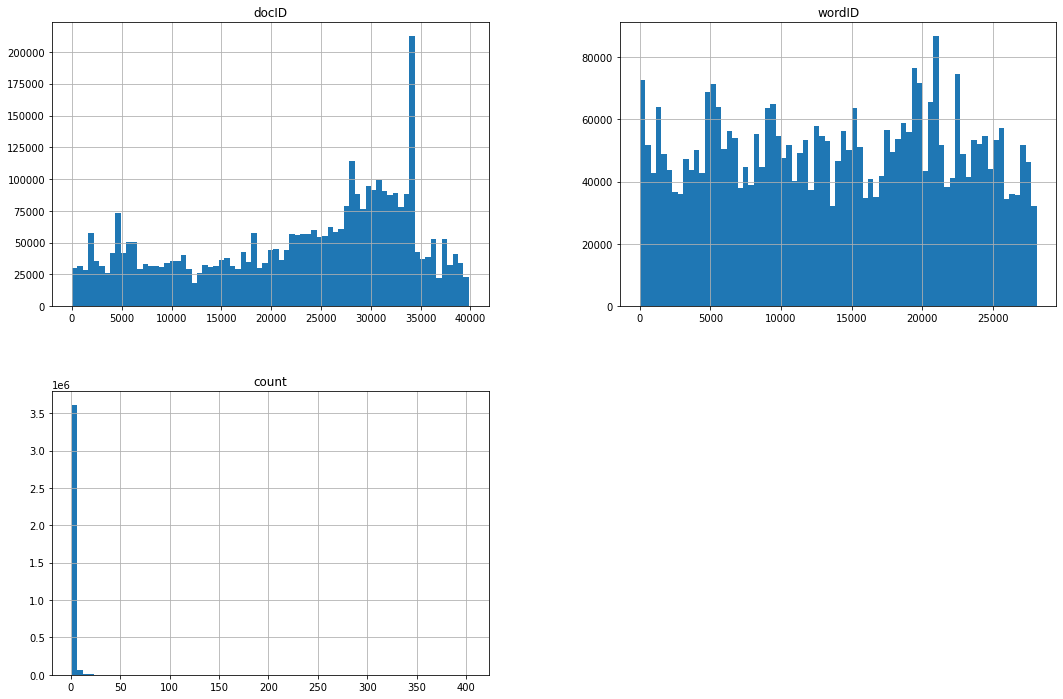

In [96]:
docword_enron.hist(bins = 73, figsize=(18, 12))
plt.show()

Widzimy, że poszczególne słowa raczej nie występowały więcej niż 30 razy w jednym dokumencie. Widać również, że jeden z dokumentów występuje znacznie cześciej niż inne co może oznaczać, że był to po prostu najdłuższy tekst - niestety ze względu na prawa autorskie nie mamy dostępu do 'słownika' dla dokumentów, który pozwoliłby nam na identyfikację poszczególnych dokumentów.

## Analiza jednowymiarowa

### docID

In [97]:
docword_enron['docID'].value_counts()

30671    2120
33962    2120
31445    2075
28980    2050
33931    2050
         ... 
380         5
27570       4
8693        3
13492       3
6492        2
Name: docID, Length: 39861, dtype: int64

In [98]:
docword_enron['docID'].value_counts().size

39861

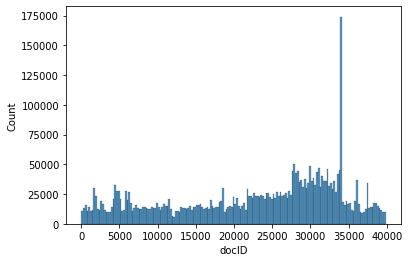

In [112]:
sns.histplot(docword_enron['docID'])
plt.show()

Zmienna ta została już przez nas wyjaśniona. Jest to po prostu numer identyfikacyjny dokumentu.

### wordID

In [99]:
docword_enron['wordID'].value_counts()

15617    7190
1583     6421
15231    6353
25181    6221
17292    6196
         ... 
16912       1
24162       1
10318       1
16539       1
11440       1
Name: wordID, Length: 28099, dtype: int64

In [114]:
docword_enron['wordID'].value_counts().size

28099

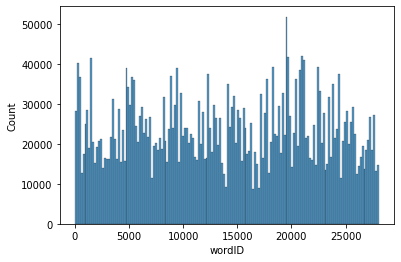

In [115]:
sns.histplot(docword_enron['wordID'])
plt.show()

Jest to po prostu numer identyfikacyjny słowa. Możemy sobie przy pomocy słownika sprawdzić, które słowa pojawiły się w największej liczbie dokumentów (niekoniecznie są one najczęściej występującymi słowami).

In [111]:
print(*vocab_enron.iloc[15617])
print(*vocab_enron.iloc[1583])
print(*vocab_enron.iloc[15231])
print(*vocab_enron.iloc[25181])
print(*vocab_enron.iloc[17292])

meeting4102
attachement
market_participant
thinker
number18002831805


Niestety, nie mając dostępu do dokumentów, nie możemy na ten moment łatwo zinterpretować zachodzących tu pewnych anomalii, czy niespodziewanych wyników.

### count

In [116]:
docword_enron['count'].value_counts()

1      2701417
2       541544
3       192167
4        94927
5        52363
        ...   
145          1
255          1
150          1
256          1
163          1
Name: count, Length: 133, dtype: int64

In [117]:
docword_enron['count'].value_counts().size

133

Jest to jak wcześniej ustaliliśmy liczba w jakiej dane słowo występowało w danym dokumencie. Zazwyczaj słowo występowało w dokumencie po jednym razie.

In [122]:
docword_enron['count'].describe()

count    3.710420e+06
mean     1.728153e+00
std      2.565260e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.030000e+02
Name: count, dtype: float64

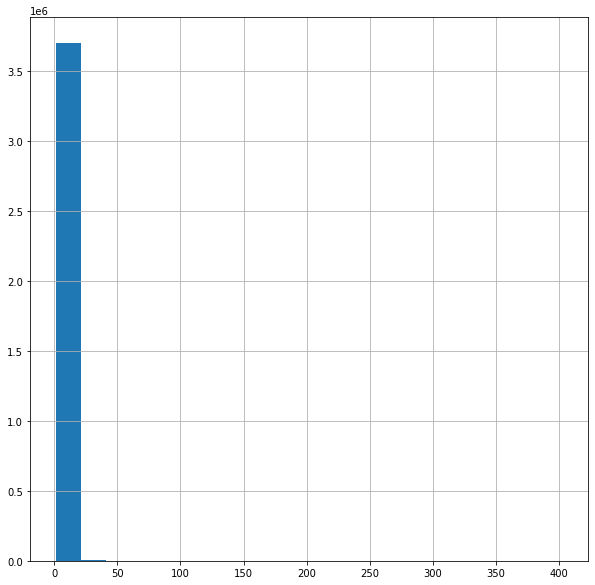

In [132]:
docword_enron['count'].hist(bins = 20, figsize=(10, 10))
plt.show()

## Analiza wielowymiarowa

Pobierzmy paczkę do NLP w języku angielskim.

In [1]:
! python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 17.4 MB/s eta 0:00:00m eta 0:00:010:00:01
You should consider upgrading via the '/hdd/anaconda3/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Zaimportujmy więcej niezbędnych bibliotek.

In [2]:
import spacy
import pandas as pd
from tqdm.auto import tqdm 
import swifter
import plotly.express as px
from wordcloud import WordCloud
import setuptools
import textacy

In [11]:
nlp = spacy.load("en_core_web_sm") # loading spacy model
vocab_enron['word']= vocab_enron['word'].astype(str)
nlp_vocab_enron = vocab_enron['word'].swifter.apply(nlp)

Pandas Apply:   0%|          | 0/28102 [00:00<?, ?it/s]

In [17]:
nlp_vocab_enron

1               (aaa)
2              (aaas)
3           (aactive)
4        (aadvantage)
5             (aaker)
             ...     
28098         (zshop)
28099      (zufferli)
28100         (zukav)
28101        (zurich)
28102        (zycher)
Name: word, Length: 28102, dtype: object

In [51]:
counter_enron = docword_enron['wordID'].value_counts()
counter_enron = pd.DataFrame({'wordID':counter_enron.index, 'counter':counter_enron.values})
df_temp = pd.DataFrame({'wordID':nlp_vocab_enron.index, 'word':nlp_vocab_enron.values})
counter_enron = pd.merge(counter_enron, df_temp, how='left', on='wordID')

In [52]:
counter_enron

,wordID,counter,word
0,15617,7190,(meeting)
1,1583,6421,(attached)
2,15231,6353,(market)
3,25181,6221,(think)
4,17292,6196,(number)
...,...,...,...
28094,16912,1,(nextlaw)
28095,24162,1,(sttn)
28096,10318,1,(gase)
28097,16539,1,(musicmatch)


In [83]:
def generate_wordcloud(df):
    counter = {}
    for wordID, counterX, word in df.values:
        counter[word.text] = counterX
    wc = WordCloud(width=1600, height=800)
    wc.generate_from_frequencies(frequencies=counter)
    plt.figure(figsize=(20, 16))
    plt.imshow(wc)
    
def generate_wordcloud_nouns(df):
    counter = {}
    for wordID, counterX, word in df.values:
        if word[0].pos_ == 'NOUN':
            counter[word.text] = counterX
    wc = WordCloud(width=1600, height=800)
    wc.generate_from_frequencies(frequencies=counter)
    plt.figure(figsize=(20, 16))
    plt.imshow(wc)
    
def generate_wordcloud_verbs(df):
    counter = {}
    for wordID, counterX, word in df.values:
        if word[0].pos_ == 'VERB':
            counter[word.text] = counterX
    wc = WordCloud(width=1600, height=800)
    wc.generate_from_frequencies(frequencies=counter)
    plt.figure(figsize=(20, 16))
    plt.imshow(wc)

Wszystkie słowa:

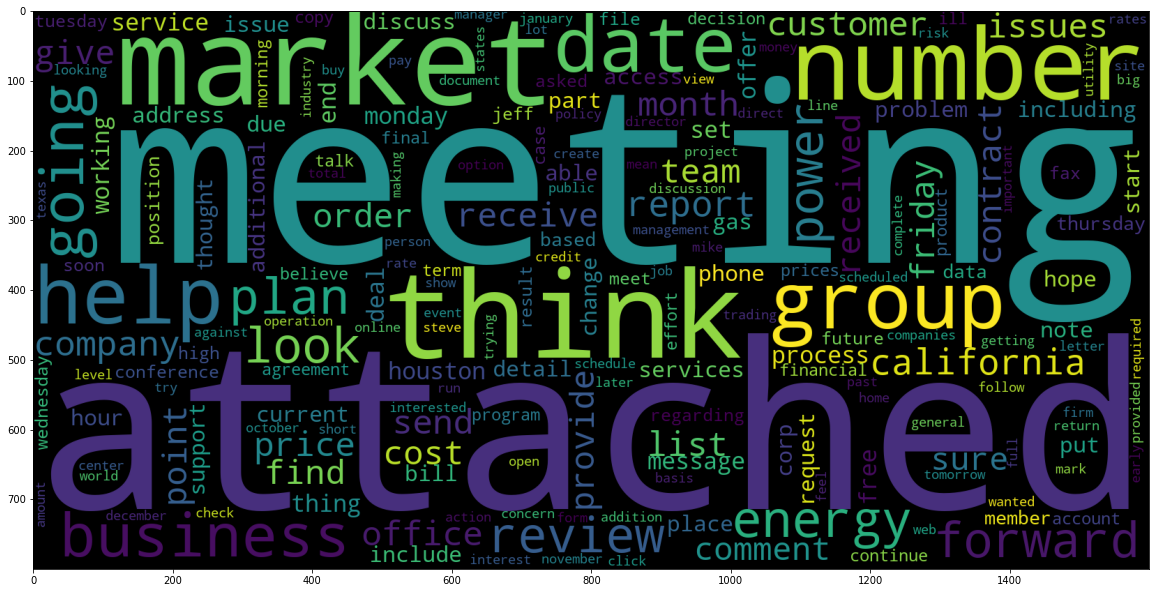

In [68]:
generate_wordcloud(counter_enron)

Tylko czasowniki:

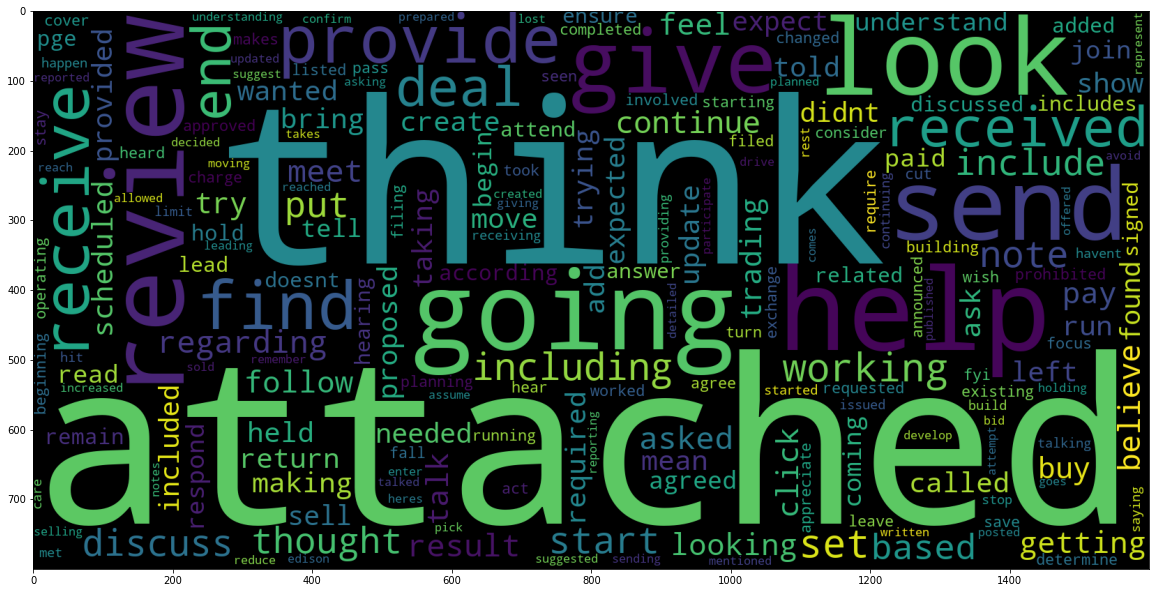

In [80]:
generate_wordcloud_verbs(counter_enron)

Tylko rzeczowniki:

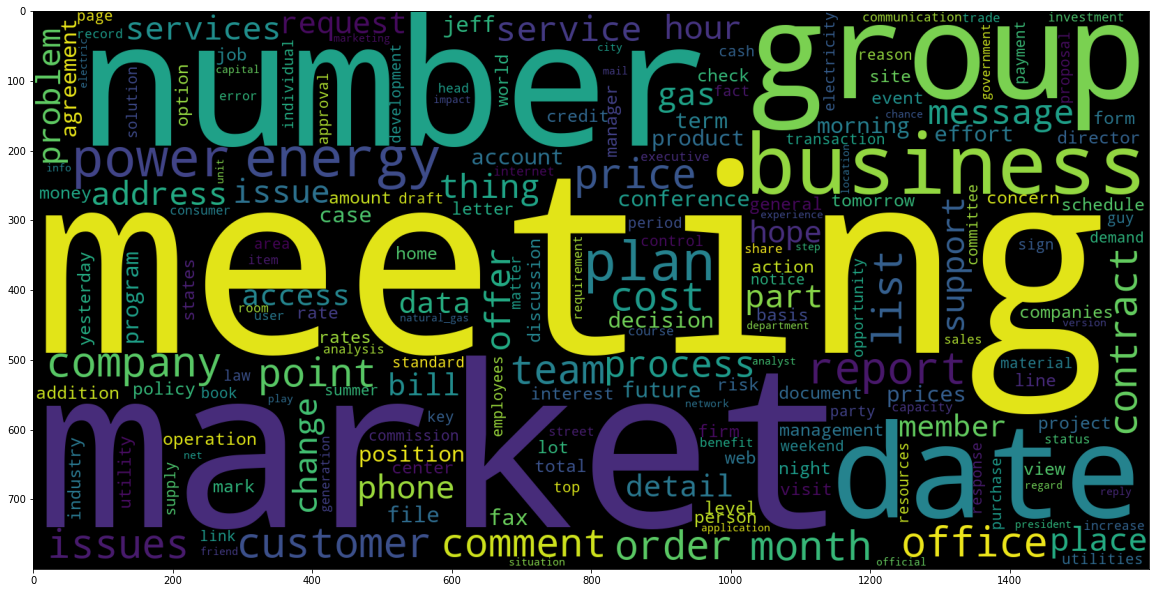

In [84]:
generate_wordcloud_nouns(counter_enron)

Otrzymane wyniki są zgodne z intuicją. Dane, które badamy pochodzą z bazy danych emaili ponad stu pracowników upadłej firmy Enron Corporation - amerykańskiego przedsiębiorstwa energetycznego z siedzibą w Houston w Teksasie, które istniało w latach 1985–2001. Pod koniec 2001 roku przedsiębiorstwo ogłosiło bankructwo po skandalu związanym z fałszowaniem dokumentacji finansowej przedsiębiorstwa. Przed ogłoszeniem bankructwa Enron zatrudniał około 22 000 pracowników i był jednym z czołowych światowych przedsiębiorstw branży energetycznej.

In [88]:
import gensim.downloader 

wv = gensim.downloader.load("glove-wiki-gigaword-200")

from sklearn.decomposition import PCA, TruncatedSVD

def plot_words(words):
  svd = TruncatedSVD(n_components=2)
  d_words = svd.fit_transform(wv[words])
  xs, ys = [], []
  for xy in d_words:
    [x,y] = xy
    xs.append(x)
    ys.append(y)
  fig, ax = plt.subplots()
  ax.scatter(xs, ys)

  for i, word in enumerate(words):
      ax.annotate(word, (xs[i], ys[i]))

[==================================================] 100.0% 252.1/252.1MB downloaded


In [101]:
all_words_nlp = list(counter_enron['word'])
all_words = [str(i) for i in all_words_nlp]
words = all_words[:10]

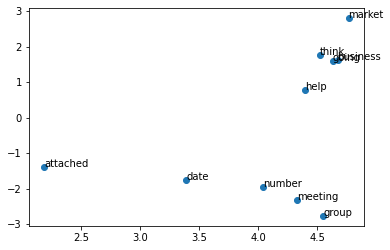

In [114]:
fig = plot_words(words)

In [122]:
for word in words:
    print('Most similar words to ' + word + ': ')
    print(wv.most_similar(word))
    print('\n')

Most similar words to meeting: 
[('meetings', 0.8284062147140503), ('conference', 0.8003754615783691), ('met', 0.7590121030807495), ('discuss', 0.7493925094604492), ('summit', 0.748295247554779), ('talks', 0.7454433441162109), ('ministers', 0.741664469242096), ('meet', 0.740420401096344), ('leaders', 0.7261191606521606), ('delegation', 0.6900278329849243)]


Most similar words to attached: 
[('attach', 0.6426160931587219), ('placed', 0.6060664057731628), ('attaching', 0.5624205470085144), ('affixed', 0.540001392364502), ('fitted', 0.5169432163238525), ('mounted', 0.516207754611969), ('shaped', 0.5118767619132996), ('connected', 0.5110657215118408), ('inside', 0.5103938579559326), ('device', 0.5051409006118774)]


Most similar words to market: 
[('markets', 0.8664628267288208), ('prices', 0.7321587204933167), ('stock', 0.715013861656189), ('investors', 0.6983222961425781), ('stocks', 0.6907606720924377), ('buying', 0.6620622873306274), ('selling', 0.6587408185005188), ('sales', 0.652794

In [133]:
print(wv.distance(words[0], words[1]))
print(wv.distance(words[1], words[2]))
print(wv.distance(words[2], words[3]))
sum = 0
for i in range(1, len(words)):
    sum += wv.distance(words[i - 1], words[i])
print(sum)

0.8077582865953445
0.8067086189985275
0.5221201777458191
5.756302744150162
